Fetch
---
Written by Takuto Wada March 2025

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, median
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

First: explore the data
---
Review the unstructured csv files and answer the following questions with code that supports your conclusions:


Are there any data quality issues present?
Are there any fields that are challenging to understand?

In [2]:
#read excel data
products = pd.read_csv('PRODUCTS_TAKEHOME.csv')
user = pd.read_csv('USER_TAKEHOME.csv')
transaction = pd.read_csv('TRANSACTION_TAKEHOME.csv')

In [3]:
products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [4]:
print("number of rows and columns of products")
print(products.shape)

number of rows and columns of products
(845552, 7)


In [5]:
print("number of unique barcode of of products")
print(products.BARCODE.nunique())
BARCODE = products["BARCODE"]
dup_prod = products[BARCODE.isin(BARCODE[BARCODE.duplicated()])].sort_values("BARCODE")
dup_prod = dup_prod['BARCODE']
#There should not be any duplicated BARCODE in products. This is a data quality issue. 
#It should have matched to 845552 above

number of unique barcode of of products
841342


In [6]:
products = products[products['BARCODE'].notna()]
products = products.sort_values(by=['BARCODE'])
products = products.drop_duplicates(subset=['BARCODE'], keep='first')

frequency of each unique value in column CATEGORY_1
Health & Wellness         510382
Snacks                    323018
Beverages                   3977
Pantry                       867
Apparel & Accessories        840
Dairy                        592
Needs Review                 547
Alcohol                      475
Home & Garden                115
NaN                          111
Deli & Bakery                 66
Frozen                        62
Meat & Seafood                49
Sporting Goods                47
Office & School               45
Restaurant                    35
Toys & Games                  28
Household Supplies            24
Produce                       20
Animals & Pet Supplies        16
Arts & Entertainment           7
Electronics                    5
Vehicles & Parts               3
Mature                         3
Baby & Toddler                 3
Media                          2
Beauty                         2
Luggage & Bags                 1
Name: CATEGORY_1, dtype:

<AxesSubplot:xlabel='CATEGORY_1', ylabel='Count'>

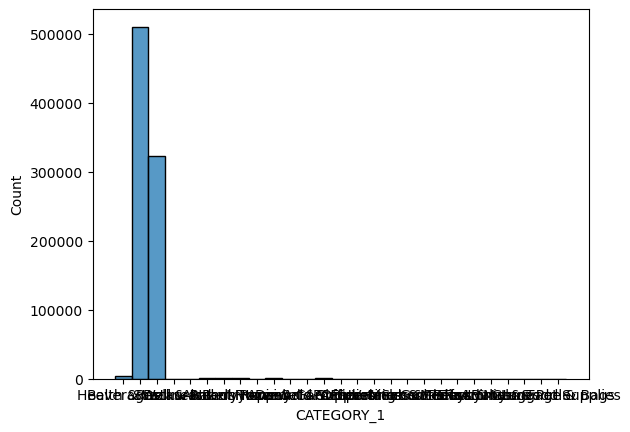

In [7]:
print("frequency of each unique value in column CATEGORY_1")
print(products['CATEGORY_1'].value_counts(dropna=False))
sns.histplot(data=products, x="CATEGORY_1")
#Almost all barcodes belong to either Health and Wellness or Snacks.

frequency of each unique value in column CATEGORY_2
Candy                     120620
Hair Care                 111167
Medicines & Treatments     98734
Bath & Body                81131
Skin Care                  62183
                           ...  
Shipping Supplies              1
Music & Recordings             1
Condiments                     1
Hard Ciders                    1
Books                          1
Name: CATEGORY_2, Length: 122, dtype: int64


<AxesSubplot:xlabel='CATEGORY_2', ylabel='Count'>

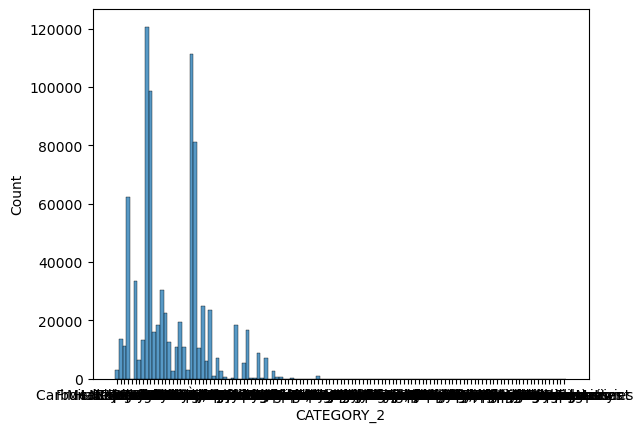

In [8]:
print("frequency of each unique value in column CATEGORY_2")
print(products['CATEGORY_2'].value_counts(dropna=False))
sns.histplot(data=products, x="CATEGORY_2", binwidth=10)

frequency of each unique value in column CATEGORY_3
Confection Candy                 56911
Vitamins & Herbal Supplements    55632
Chocolate Candy                  47552
Hair Styling Products            20406
Reading Glasses                  20392
                                 ...  
Chair & Sofa Cushions                1
Flameless Candles                    1
Sours & Fruit Beer                   1
Cocktail Sauces                      1
Slot Machines                        1
Name: CATEGORY_3, Length: 341, dtype: int64


<AxesSubplot:xlabel='CATEGORY_3', ylabel='Count'>

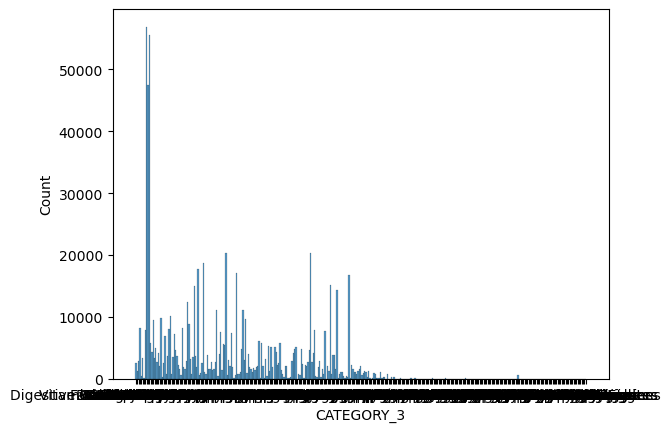

In [9]:
print("frequency of each unique value in column CATEGORY_3")
print(products['CATEGORY_3'].value_counts())
sns.histplot(data=products, x="CATEGORY_3", binwidth=10)

CATEGORY_2 and CATEGORY_3 look like great columns to use for analysis. There is a lot of variety and no apparent data issue.

frequency of each unique value in column CATEGORY_4
NaN                         774110
Lip Balms                     9712
Already Popped Popcorn        6956
Sleep Aids                    4968
Hair Brushes & Combs          4720
                             ...  
Beverage Warmers                 1
Sherbet                          1
Craft Paint, Ink & Glaze         1
White Merlot                     1
Wall Clocks                      1
Name: CATEGORY_4, Length: 127, dtype: int64


<AxesSubplot:xlabel='CATEGORY_4', ylabel='Count'>

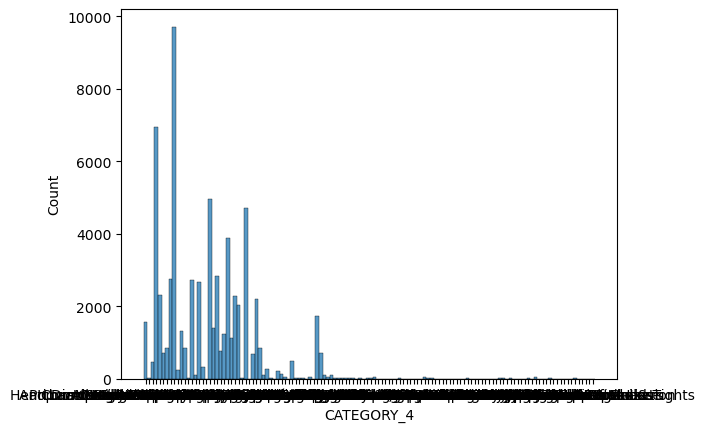

In [10]:
print("frequency of each unique value in column CATEGORY_4")
print(products['CATEGORY_4'].value_counts(dropna=False))
sns.histplot(data=products, x="CATEGORY_4", binwidth=10)
#CATEGORY_4 contains some data quality issue where majority are NaN. Data quality issue

In [11]:
print("frequency of each unique value in column MANUFACTURER")
print(products['MANUFACTURER'].value_counts(dropna=False))
# sns.histplot(data=products, x="MANUFACTURER", binwidth=10)

frequency of each unique value in column MANUFACTURER
NaN                                  226213
PLACEHOLDER MANUFACTURER              86897
REM MANUFACTURER                      20813
PROCTER & GAMBLE                      20796
L'OREAL                               16673
                                      ...  
CULTURES FOR HEALTH, INC                  1
THAMES & KOSMOS LLC                       1
THE FROZENBEAN INC                        1
COMMERCIAL ELECTRIC PRODUCTS, LLC         1
BONDI BOOST PTY, LTD                      1
Name: MANUFACTURER, Length: 4355, dtype: int64


In [12]:
print("frequency of each unique value in column BRAND")
print(products['BRAND'].value_counts(dropna=False))

frequency of each unique value in column BRAND
NaN                226211
REM BRAND           20813
BRAND NOT KNOWN     17021
PRIVATE LABEL       13467
CVS                  6400
                    ...  
LIGHTLIFE               1
GLORY FURNITURE         1
PLUMROSE                1
MY TEXAS HOUSE          1
ROCKIT                  1
Name: BRAND, Length: 8054, dtype: int64


The top 2 common manufacturers are NaN and placeholder. Similarly the most common brand entry is NaN. These are data qualities issue that should be looked at.

In [13]:
print("number of rows and columns of user table")
print(user.shape)

number of rows and columns of user table
(100000, 6)


In [14]:
print("number of unique users in user table")
print(user.ID.nunique())
# No duplication of users - good

number of unique users in user table
100000


In [15]:
print("Minimum and maximum created date in user table")
user['CREATED_DATE'] = pd.to_datetime(user['CREATED_DATE'])
print(user.CREATED_DATE.min())
print(user.CREATED_DATE.max())
# Oldest user is 10 years old and newest user is 6 months old as of today. Looks good

Minimum and maximum created date in user table
2014-04-18 23:14:55+00:00
2024-09-11 17:59:15+00:00


In [16]:
print("Minimum and maximum birth date in user table")
user['BIRTH_DATE'] = pd.to_datetime(user['BIRTH_DATE'])
print(user.BIRTH_DATE.min())
print(user.BIRTH_DATE.max())
#This looks like data quality issue/or fake entry of birthdate.
#I do not assume a 125 year old or a 3 year old to be part of the dataset. 
#Outliers should be cleaned up. Perhaps keeping only age 15-80.

Minimum and maximum birth date in user table
1900-01-01 00:00:00+00:00
2022-04-03 07:00:00+00:00


Distribution of where users are from
TX    9028
FL    8921
CA    8589
NY    5703
IL    3794
GA    3718
PA    3644
OH    3519
NC    3399
NJ    2899
MI    2582
VA    2400
IN    2213
TN    2165
AL    1792
SC    1773
KY    1731
AZ    1728
MO    1652
MD    1636
MA    1523
WI    1389
PR    1361
LA    1290
WA    1234
CO    1139
MN    1125
CT    1110
OK    1100
AR    1011
MS     960
IA     933
NV     837
KS     835
OR     700
WV     674
UT     593
DE     492
NE     487
NM     452
ME     368
NH     359
HI     350
ID     350
AK     297
RI     284
DC     241
SD     205
ND     185
MT     169
WY     138
VT     111
Name: STATE, dtype: int64


<AxesSubplot:xlabel='STATE', ylabel='Count'>

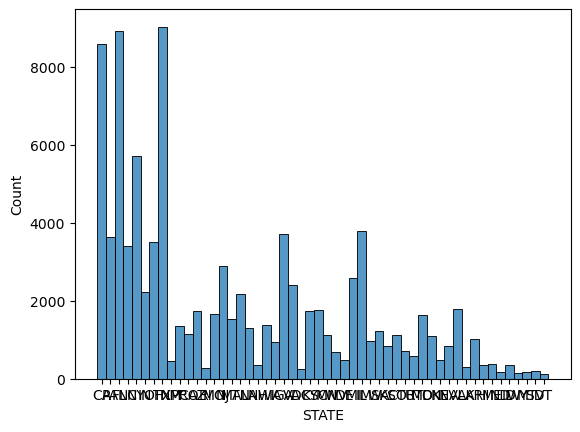

In [17]:
print("Distribution of where users are from")
print(user.STATE.value_counts())
sns.histplot(data=user, x="STATE", binwidth=10)
#A lot of users from the big states: TX, FL,CA,NY,IL. This makes sense.

In [18]:
print("number of rows and columns of user table")
print(user.LANGUAGE.value_counts(dropna=False))
#Mostly english, little bit of spanish, and rest are blank.

number of rows and columns of user table
en        63403
NaN       30508
es-419     6089
Name: LANGUAGE, dtype: int64


In [19]:
print("number of rows and columns of user table")
print(user.GENDER.value_counts(dropna=False))
#Majority are females

number of rows and columns of user table
female                    64240
male                      25829
NaN                        5892
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: GENDER, dtype: int64


In [20]:
print("number of rows and columns of transaction table")
print(transaction.shape)

number of rows and columns of transaction table
(50000, 8)


In [21]:
print("number of rows and columns of user table")
print(transaction.RECEIPT_ID.nunique())
#RECEIPT ID should be the primary key and there should not be any duplication. This is a data issue

number of rows and columns of user table
24440


In [22]:
# RECEIPT_ID = transaction["RECEIPT_ID"]
# dup_receipt = transaction[RECEIPT_ID.isin(RECEIPT_ID[RECEIPT_ID.duplicated()])].sort_values("RECEIPT_ID")
# dup_receipt = dup_receipt['RECEIPT_ID']
# dup_receipt.tail(20)

In [66]:
transaction = pd.read_csv('TRANSACTION_TAKEHOME.csv')

In [23]:
transaction = transaction[transaction['RECEIPT_ID'].notna()]
transaction = transaction.sort_values(by=['RECEIPT_ID','FINAL_SALE'])
transaction = transaction.drop_duplicates(subset=['RECEIPT_ID'], keep='last')
transaction

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
41567,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,1.54
39291,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,1.00,1.49
25928,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,2.54
41475,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,1.00,3.49
43233,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,5.29
...,...,...,...,...,...,...,...,...
43173,fff60bb7-bf93-4e6b-8055-4d7688da7ead,2024-08-29,2024-08-29 23:47:50.471 Z,WALMART,5eb887f71699c213b1abe2e1,7.874221e+10,1.00,1.23
32904,fff6c6c8-e002-4262-85ea-25849d9721db,2024-08-30,2024-09-06 18:39:03.161 Z,WALMART,6220b111e9e82c0c6bc24534,7.874237e+10,1.00,1.97
28152,fffbb112-3cc5-47c2-b014-08db2f87e0c7,2024-07-30,2024-08-04 11:43:31.474 Z,WALMART,5eb59d6be7012d13941af5e2,8.180000e+11,1.00,4.88
31602,fffbfb2a-7c1f-41c9-a5da-628fa7fcc746,2024-07-28,2024-07-28 11:47:34.180 Z,WALMART,62a0c8f7d966665570351bb8,1.300001e+10,1.00,3.48


In [24]:
print("number of rows and columns of user table")
transaction['PURCHASE_DATE'] = pd.to_datetime(transaction['PURCHASE_DATE'])
print(transaction.PURCHASE_DATE.min())
print(transaction.PURCHASE_DATE.max())
#Transaction is taken from June and September of 2024. 

number of rows and columns of user table
2024-06-12 00:00:00
2024-09-08 00:00:00


In [25]:
print("number of rows and columns of user table")
transaction['SCAN_DATE'] = pd.to_datetime(transaction['SCAN_DATE'])
print(transaction.SCAN_DATE.min())
print(transaction.SCAN_DATE.max())
#This matches purchase date. Good

number of rows and columns of user table
2024-06-12 06:36:34.910000+00:00
2024-09-08 23:07:19.836000+00:00


In [26]:
print("frequency of each unique value in column STORE_NAME")
print(transaction['STORE_NAME'].value_counts(dropna=False))
# sns.histplot(data=transaction, x="STORE_NAME", binwidth=10)
#Majority Walmart

frequency of each unique value in column STORE_NAME
WALMART                  10347
DOLLAR GENERAL STORE      1360
ALDI                      1278
TARGET                     739
KROGER                     725
                         ...  
FOOD ZONE                    1
WWW.SHOPMAR MARVE            1
SPIRITS                      1
PONTE FRESCO                 1
PLATEAU TRAVEL CENTER        1
Name: STORE_NAME, Length: 954, dtype: int64


In [27]:
print("Number of unique user in transaction table")
print(transaction.USER_ID.nunique())
# There are returning customers. 17694/24440 -> 27% of data are from returning customer

Number of unique user in transaction table
17694


In [28]:
print("Number of unique barcode in transaction table")
print(transaction.BARCODE.nunique())
# Barcodes are being sold more than once

Number of unique barcode in transaction table
10945


In [29]:
transaction['FINAL_QUANTITY'] = pd.to_numeric(transaction['FINAL_QUANTITY'], errors='coerce')
print(transaction.FINAL_QUANTITY.min())
print(transaction.FINAL_QUANTITY.max())
print(transaction.FINAL_QUANTITY.mean())
print(transaction.FINAL_QUANTITY.median())
#This makes sense. On Average people purchase 1 item

0.01
276.0
1.0846292962356796
1.0


In [30]:
transaction['FINAL_SALE'] = pd.to_numeric(transaction['FINAL_SALE'], errors='coerce')
print(transaction.FINAL_SALE.min())
print(transaction.FINAL_SALE.max())
print(transaction.FINAL_SALE.mean())
print(transaction.FINAL_SALE.median())
#This makes sense. On Average people spend $4.5 dollars. $0 sale can be ommited out

0.0
462.82
4.602261865793875
3.1


Second: provide SQL queries
---
What are the top 5 brands by receipts scanned among users 21 and over?
---

Nerds candy, dove, trident, sour path kids, and hershey's are the top 5 brands among users over 21 years old.I did notice that majority of users in transactions table are not in user table. I used an inner join to make sure that only 21+ are captured.


In [ ]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())


In [32]:
trans = transaction

In [33]:
query1 = """
Select 
    P.BRAND,
    count(RECEIPT_ID) as receipts_scanned
from
    trans T
inner join
    user U
on
    T.USER_ID=U.ID
    and (strftime('%Y', date('now')) - U.BIRTH_DATE) >=21
inner join
    products P
on 
    P.BARCODE=T.BARCODE
where 
    P.BRAND <>'None'
group by
    P.BRAND

order by receipts_scanned desc
LIMIT 5

"""
result1 = pysqldf(query1)
result1

,BRAND,receipts_scanned
0,NERDS CANDY,3
1,DOVE,3
2,TRIDENT,2
3,SOUR PATCH KIDS,2
4,HERSHEY'S,2


What are the top 5 brands by sales among users that have had their account for at least six months?
---

CVS, Dove, trident, coors light, and tresemme are the top 5 brands for acccounts 6 months and older.

In [34]:
query2 = """
Select 
    P.BRAND,
    sum(FINAL_SALE) as sale
from
    trans T
inner join
    user U
on
    T.USER_ID=U.ID
    and CREATED_DATE <= '2024-09-07'
inner join
    products P
on 
    P.BARCODE=T.BARCODE 
group by
    P.BRAND
order by sale desc
limit 5

"""
result2 = pysqldf(query2)
result2

,BRAND,sale
0,CVS,72.00
1,DOVE,30.91
2,TRIDENT,23.36
3,COORS LIGHT,17.48
4,TRESEMMÉ,14.58


Which is the leading brand in the Dips & Salsa category?
---
Tostito is the obvious leading brand in Dips and Salsa. I assumed the leading brand to have the highest sale, highest quality, and highest number of people buying it. Tostitos has the highest score in all 3 metrics.

In [37]:
query3 = """
Select
    
    P.BRAND,
    sum(FINAL_SALE) as total_sale,
    sum(FINAL_QUANTITY) as total_quantity,
    count(distinct(t.USER_ID)) unique_user_count

from
    trans T 
inner join
    products P
on 
    P.BARCODE=T.BARCODE
    and p.CATEGORY_2 = 'Dips & Salsa'
group by
    P.BRAND
order by total_sale desc

"""
result3 = pysqldf(query3)
result3.head(10)

,BRAND,total_sale,total_quantity,unique_user_count
0,TOSTITOS,181.30,38.0,35
1,None,100.97,22.0,21
2,GOOD FOODS,94.91,9.0,9
3,PACE,79.73,22.0,22
4,MARKETSIDE,65.22,16.0,16
5,FRITOS,65.22,19.0,18
6,HELUVA GOOD!,52.01,14.0,14
7,MARZETTI,51.14,11.0,11
8,FRESHNESS GUARANTEED,46.66,12.0,12
9,DEAN'S DAIRY DIP,39.95,17.0,17


Third: communicate with stakeholders
---
Construct an email or slack message that is understandable to a product or business leader who is not familiar with your day-to-day work. 
--

Summarize the results of your investigation. 

Include:
* Key data quality issues and outstanding questions about the data
* One interesting trend in the data. Use a finding from part 2 or come up with a new insight
* Request for action: explain what additional help, info, etc. you need to make sense of the data and resolve any outstanding issues

Email/Slack message to product/business leader
--
Hi there, 

I just looked at the data you sent over, and here are couple of insights that should be useful to you, along with few questions so that I could get a better understanding of the data.

* Where did you get this data from? I am seeing some data quality issues (specifically in Products table). Do you have any contacts that I could talk to? I think it is in the best interest of the company to clean up some of the product categorization so we can deliver insights more confidently. 
* I found it very interesting that we have some 125 year olds and 2 year olds in our system. Have there been discussions about implementing data verification to ensure our users are who they say they are?
* I would love to hop on a call soon to walk you through the findings above and figure out how we can solve the data quality issues. 

Thanks,
Takuto